# Highway with SB3's DQN

##  Warming up
We start with a few useful installs and imports:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install environment and agent
!pip install highway-env
!pip install stable-baselines3

# Environment
import gym
import highway_env

# Agent
from stable_baselines3 import DQN

#SHAP
!pip install shap
import shap

# Visualization utils
%load_ext tensorboard
import sys
from tqdm.notebook import trange
!pip install tensorboardx gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git 2> /dev/null
sys.path.insert(0, '/content/highway-env/scripts/')
from utils import record_videos, show_videos

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3.common.policies import BaseModel
import torch
device = torch.device('cuda')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-

## Training
Run tensorboard locally to visualize training.

In [3]:
model = DQN.load ("/content/drive/MyDrive/modello100000")
'''
model = DQN('MlpPolicy', "highway-fast-v0",
                policy_kwargs=dict(net_arch=[256, 256]),
                learning_rate=5e-4,
                buffer_size=15000,
                learning_starts=200,
                batch_size=32,
                gamma=0.8,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=50,
                exploration_fraction=0.7,
                verbose=1,
                tensorboard_log="highway_dqn/")

env = gym.make("highway-fast-v0")
model.set_env(env)
model.learn(int(50000))
model.save("modello100000")
!cp "/content/modello100000.zip" "/content/drive/MyDrive"
'''


'\nmodel = DQN(\'MlpPolicy\', "highway-fast-v0",\n                policy_kwargs=dict(net_arch=[256, 256]),\n                learning_rate=5e-4,\n                buffer_size=15000,\n                learning_starts=200,\n                batch_size=32,\n                gamma=0.8,\n                train_freq=1,\n                gradient_steps=1,\n                target_update_interval=50,\n                exploration_fraction=0.7,\n                verbose=1,\n                tensorboard_log="highway_dqn/")\n\nenv = gym.make("highway-fast-v0")\nmodel.set_env(env)\nmodel.learn(int(50000))\nmodel.save("modello100000")\n!cp "/content/modello100000.zip" "/content/drive/MyDrive"\n'

# SHAP


In [4]:
#Get the state_log and action_log
action_log_list = []
state_log_list = []
    
env = gym.make("highway-fast-v0")
env = record_videos(env)

s, done = env.reset(), False

while not(done):
    a, _ = model.predict(s, deterministic = True)   #ddpg.choose_action()
    s, r, done, info = env.step(a)
    
    action_log_list.append(a)
    state_log_list.append(s)
    state_log = np.array(state_log_list)
    action_log = np.array(action_log_list)
 
env.close()
show_videos()

In [5]:
print (env.vehicle.heading)
#print (state_log.shape)
#print (action_log)
print (state_log)


-0.09735824063705335
[[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00  4.89026070e-01
    0.00000000e+00]
  [ 1.00000000e+00  1.19095936e-01  6.66666687e-01 -1.03868105e-01
    0.00000000e+00]
  [ 1.00000000e+00  2.59396225e-01  3.33333343e-01 -1.86926261e-01
    0.00000000e+00]
  [ 1.00000000e+00  4.20600891e-01  3.33333343e-01 -1.15572564e-01
    0.00000000e+00]
  [ 1.00000000e+00  5.52912593e-01  0.00000000e+00 -2.13908672e-01
    0.00000000e+00]]

 [[ 1.00000000e+00  1.00000000e+00  0.00000000e+00  4.98554885e-01
    0.00000000e+00]
  [ 1.00000000e+00  7.42184818e-02  6.66666687e-01 -1.20219767e-01
    0.00000000e+00]
  [ 1.00000000e+00  1.78383499e-01  3.33333343e-01 -2.16213748e-01
    0.00000000e+00]
  [ 1.00000000e+00  3.69525015e-01  3.33333343e-01 -1.41628534e-01
    0.00000000e+00]
  [ 1.00000000e+00  4.57053483e-01  0.00000000e+00 -2.64319360e-01
    0.00000000e+00]]

 [[ 1.00000000e+00  1.00000000e+00  0.00000000e+00  4.99809682e-01
    0.00000000e+00]
  [ 1.00000000e+00

In [6]:
feature_names=['presence', 'x_position', 'y_position', 'x_velocity', 'y_velocity']

In [7]:
env = gym.make("highway-fast-v0")
shap_action = []
shap_values = []
def explain(state_log=state_log, feature_names=feature_names, action_log=action_log, cmap='coolwarm', save_fig=False):
    
    explainer = shap.DeepExplainer(model.q_net, torch.FloatTensor(state_log).to(device))
    #shap_values = explainer.shap_values(torch.FloatTensor(state_log).to(device), ranked_outputs = 1, output_rank_order='max')
    shap_values = explainer.shap_values(torch.FloatTensor(state_log).to(device))
    for i in range(action_log.shape[0]):
      shap_action.append(shap_values[action_log[i]][i,:,:])
                                             
    print (shap_action)
    print (action_log)
    #print ("shap: ", [len(a) for a in shap_values]) 
    #shapp = shap_values[0][:,0,:] #First row of first block
   
    

In [8]:
#import matplotlib.gridspec as gridspec
explain()

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


[array([[ 0.00000000e+00,  0.00000000e+00, -8.84367898e-03,
        -1.56643090e-03,  1.32370519e-03],
       [ 0.00000000e+00, -5.58265895e-02,  4.47580129e-01,
        -3.92513089e-02,  1.39255205e-03],
       [ 0.00000000e+00,  1.74720734e-01, -2.47455016e-01,
        -2.70598438e-02, -5.71556948e-03],
       [ 0.00000000e+00,  1.58715416e-02,  6.20740093e-02,
         1.38402730e-02, -2.57462816e-04],
       [ 0.00000000e+00,  2.59658620e-02, -3.17110680e-02,
        -9.66171920e-03, -2.70995614e-03]]), array([[ 0.00000000e+00,  0.00000000e+00, -5.00467956e-01,
         9.21305793e-04, -4.24648868e-03],
       [ 0.00000000e+00, -6.02850039e-03,  1.06213796e+00,
         1.43836476e-02,  2.29044612e-02],
       [ 0.00000000e+00,  5.57209924e-02,  2.27351859e-01,
        -2.76560383e-03, -1.89020380e-03],
       [ 0.00000000e+00,  1.38201872e-02,  6.95302561e-02,
         7.45982444e-03,  1.02849044e-02],
       [ 0.00000000e+00,  2.75329612e-02,  3.10576428e-02,
        -2.80414131e

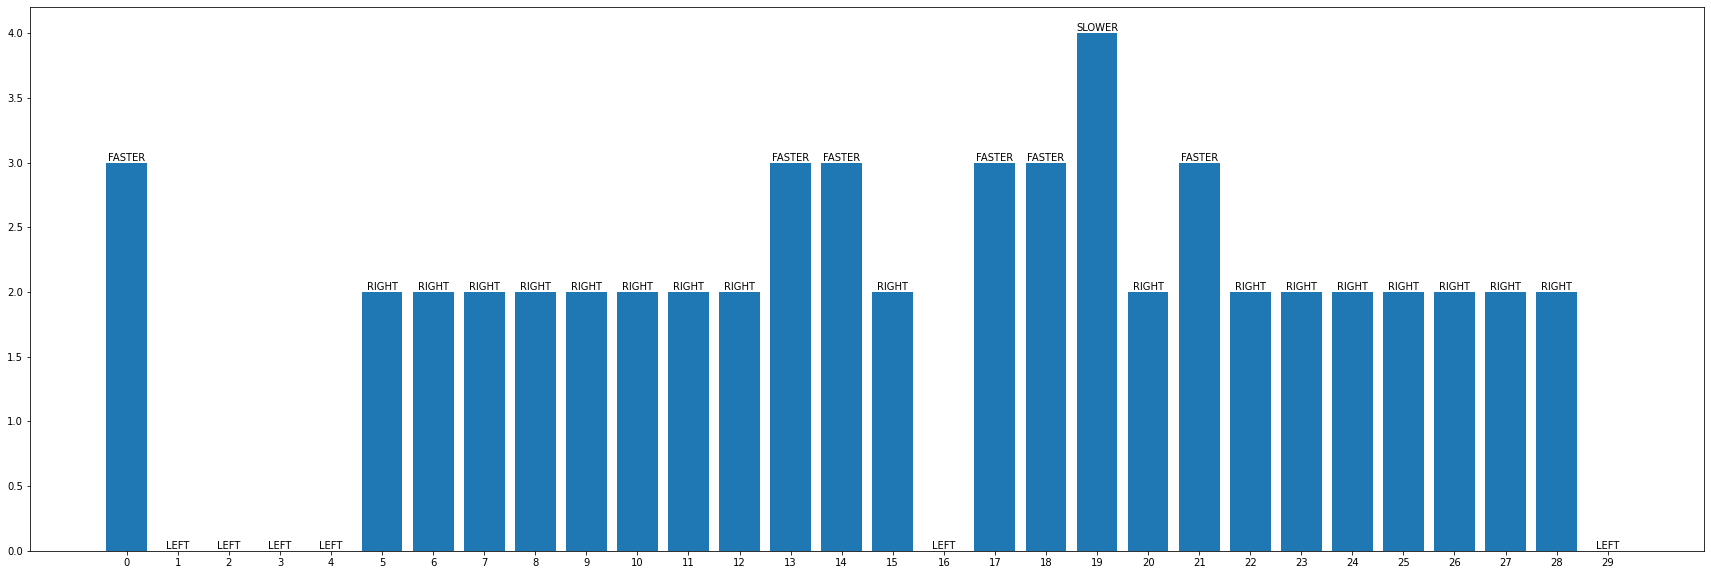

In [9]:
from matplotlib import pyplot
import seaborn as sns

array = np.arange(0,30)
fig = plt.figure(figsize=(30,10))
plt.bar (array, action_log)
plt.xticks(array)

for i in range(len(action_log)):
    if (action_log[i] == 0):
      plt.annotate("LEFT", xy=(array[i],action_log[i]), ha='center', va='bottom')
    elif (action_log[i] == 1):
      plt.annotate("IDLE", xy=(array[i],action_log[i]), ha='center', va='bottom')
    elif (action_log[i] == 2):
      plt.annotate("RIGHT", xy=(array[i],action_log[i]), ha='center', va='bottom')
    elif (action_log[i] == 3):
      plt.annotate("FASTER", xy=(array[i],action_log[i]), ha='center', va='bottom')
    elif (action_log[i] == 4):
      plt.annotate("SLOWER", xy=(array[i],action_log[i]), ha='center', va='bottom')


In [10]:
#max(shap_action[0])
#print (max (shap_action[0][0]))
#print (shap_action[0][0].max())
print (shap_action[0])
print (shap_action[0].max())
a, b = (np.where(shap_action[0] == shap_action[0].max()))
print (a,b)





[[ 0.00000000e+00  0.00000000e+00 -8.84367898e-03 -1.56643090e-03
   1.32370519e-03]
 [ 0.00000000e+00 -5.58265895e-02  4.47580129e-01 -3.92513089e-02
   1.39255205e-03]
 [ 0.00000000e+00  1.74720734e-01 -2.47455016e-01 -2.70598438e-02
  -5.71556948e-03]
 [ 0.00000000e+00  1.58715416e-02  6.20740093e-02  1.38402730e-02
  -2.57462816e-04]
 [ 0.00000000e+00  2.59658620e-02 -3.17110680e-02 -9.66171920e-03
  -2.70995614e-03]]
0.44758012890815735
[1] [2]


# Testing


In [11]:
env = gym.make("highway-fast-v0")
env = record_videos(env)
for episode in trange(3, desc="Test episodes"):
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
env.close()
show_videos()


Test episodes:   0%|          | 0/3 [00:00<?, ?it/s]